<a href="https://colab.research.google.com/github/Sinandah/Sinandah/blob/main/titan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

titanic_df = pd.read_csv(url)

print(titanic_df.info())

print(titanic_df.head(3))

print(titanic_df[features].dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values (assuming numerical features)
imputer = SimpleImputer(strategy='mean')
titanic_df[['Age', 'Fare']] = imputer.fit_transform(titanic_df[['Age', 'Fare']])

# Select relevant features for clustering
features = ['Age', 'Pclass', 'Fare', 'SibSp', 'Parch']

# Normalize or standardize features (optional)
scaler = StandardScaler()
titanic_df_scaled = scaler.fit_transform(titanic_df[features])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

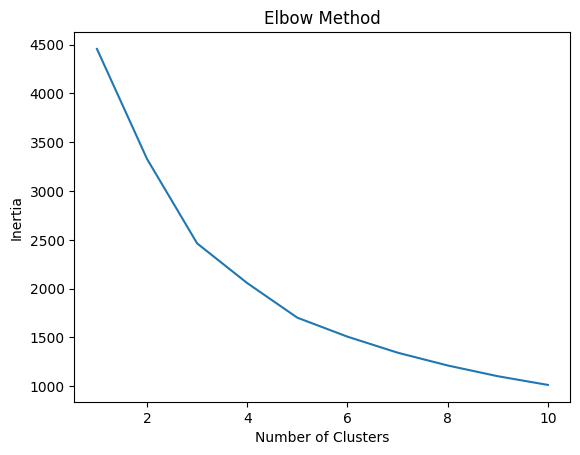

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
#clustering

from sklearn.cluster import KMeans

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(titanic_df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia_values)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=6)  # Assuming elbow method suggested 3 clusters
clusters = kmeans.fit_predict(titanic_df_scaled)
titanic_df['Cluster'] = clusters


Cluster
0    0.648936
1    0.439252
2    0.520179
3    0.718750
4    0.073171
5    0.233503
Name: Survived, dtype: float64


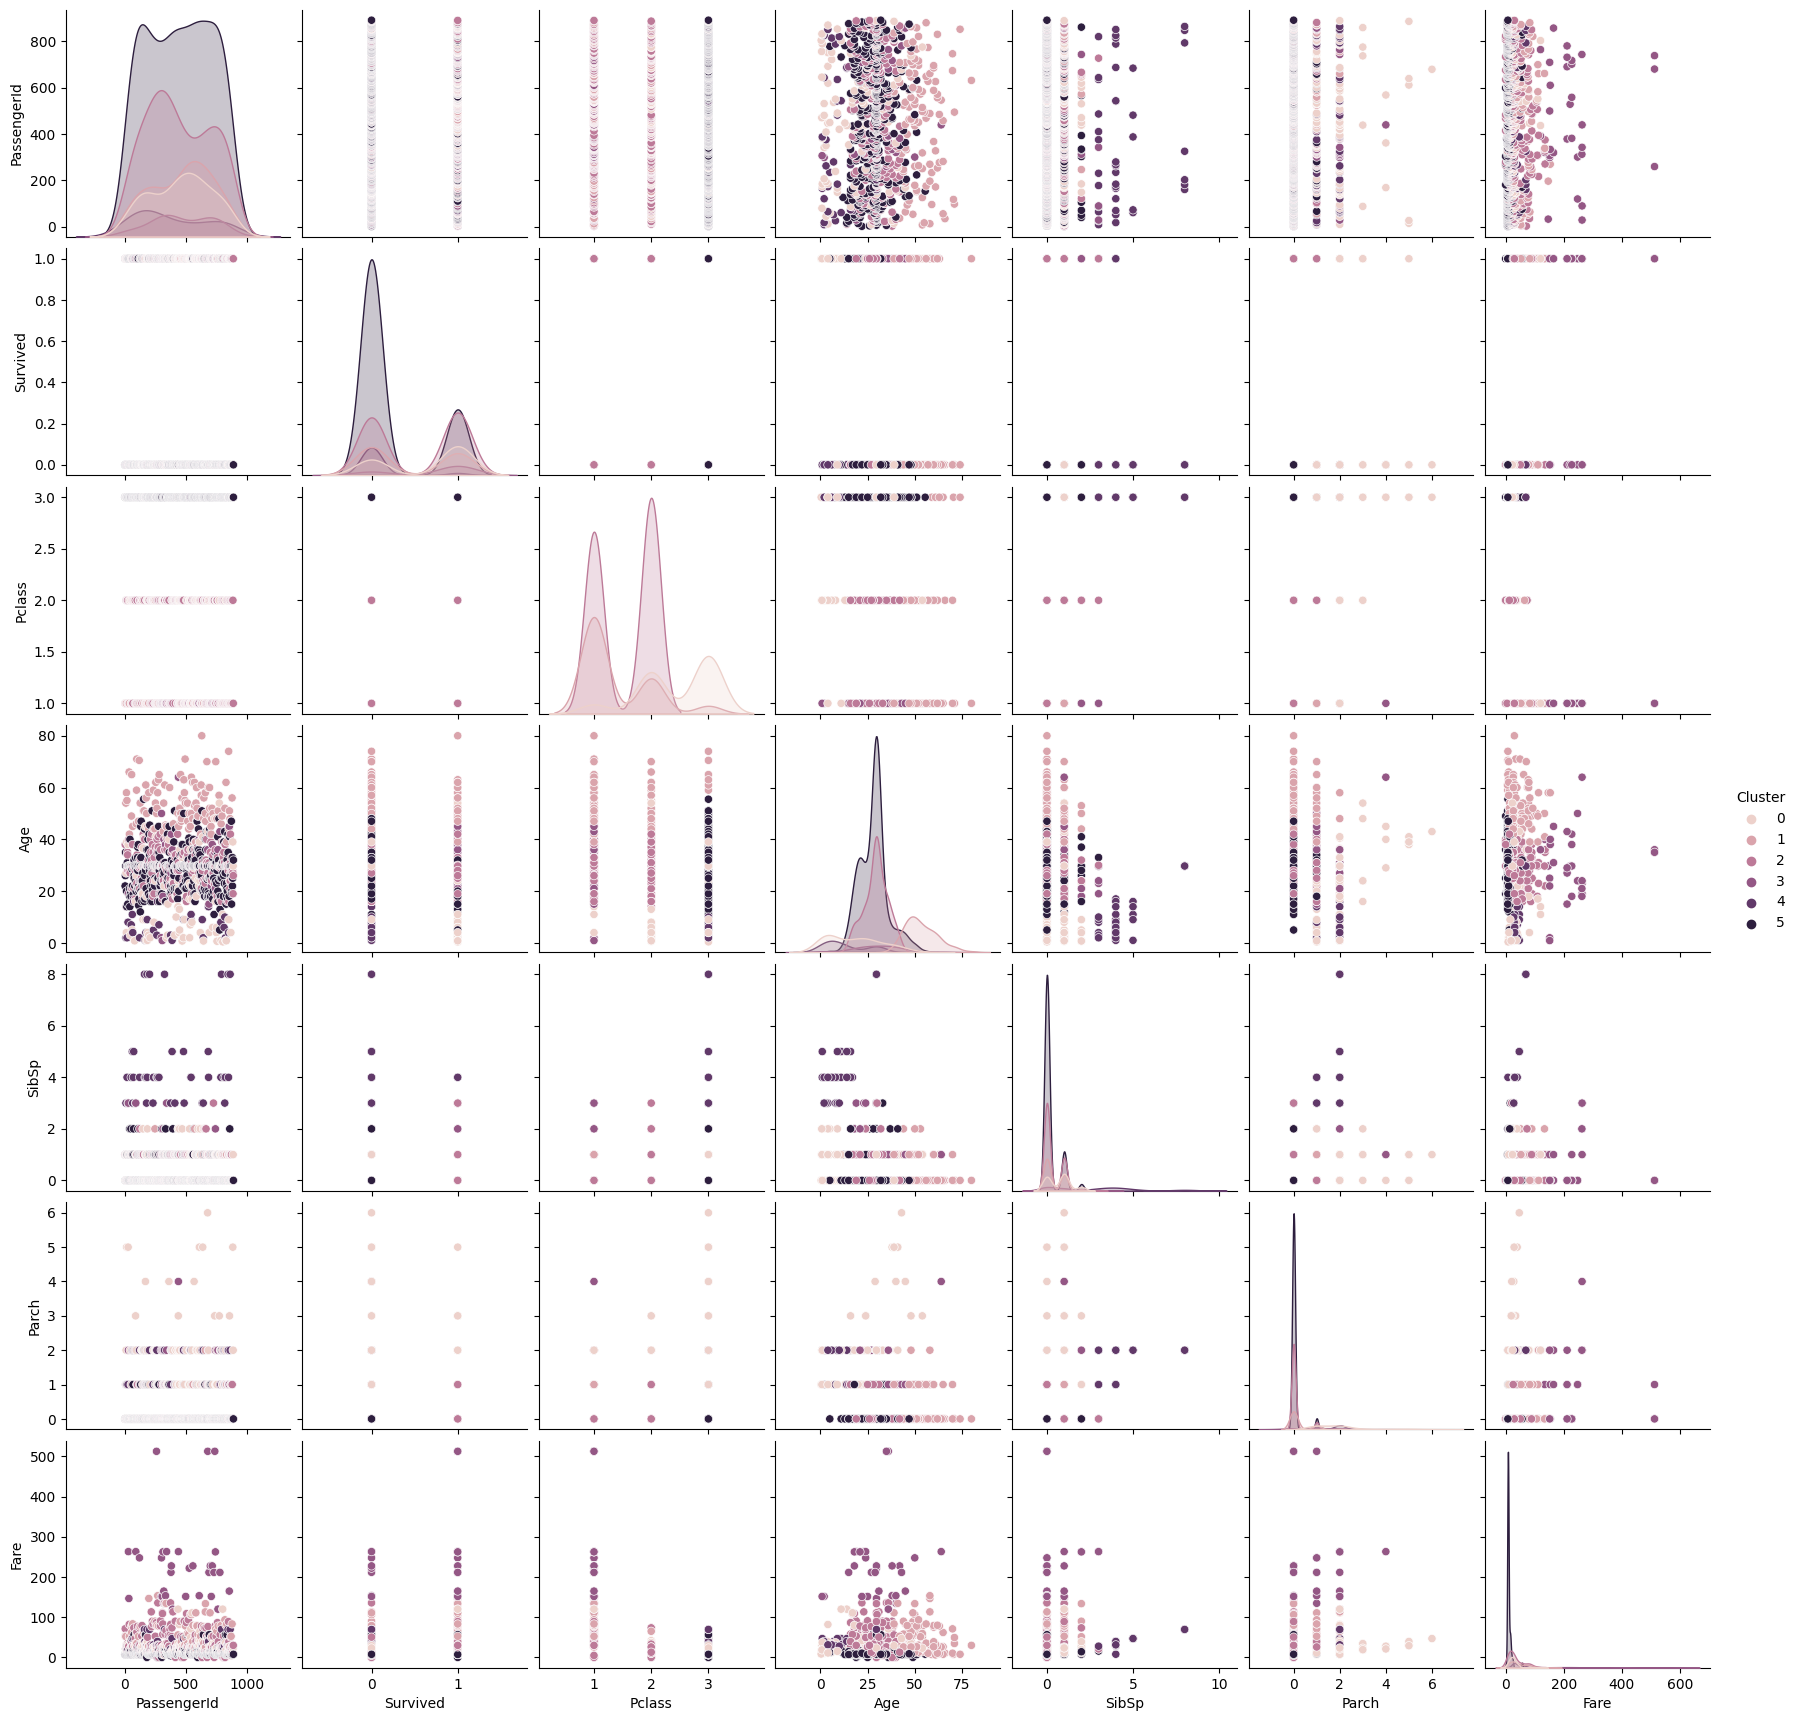

In [14]:
#survival analysis
# Calculate survival rates for each cluster
survival_rates = titanic_df.groupby('Cluster')['Survived'].mean()
print(survival_rates)

# Visualize cluster characteristics (optional)
import seaborn as sns
sns.pairplot(titanic_df, hue='Cluster')
plt.show()


In [15]:
#anomaly detection
#isolation forest
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest()
outlier_scores = isolation_forest.fit_predict(titanic_df_scaled)
titanic_df['Outlier'] = outlier_scores

# Investigate anomalies (passengers with scores of -1)
anomalies = titanic_df[titanic_df['Outlier'] == -1]
print(anomalies)


     PassengerId  Survived  Pclass  \
7              8         0       3   
10            11         1       3   
13            14         0       3   
16            17         0       3   
24            25         0       3   
..           ...       ...     ...   
863          864         0       3   
869          870         1       3   
871          872         1       1   
879          880         1       1   
885          886         0       3   

                                                 Name     Sex        Age  \
7                      Palsson, Master. Gosta Leonard    male   2.000000   
10                    Sandstrom, Miss. Marguerite Rut  female   4.000000   
13                        Andersson, Mr. Anders Johan    male  39.000000   
16                               Rice, Master. Eugene    male   2.000000   
24                      Palsson, Miss. Torborg Danira  female   8.000000   
..                                                ...     ...        ...   
863        

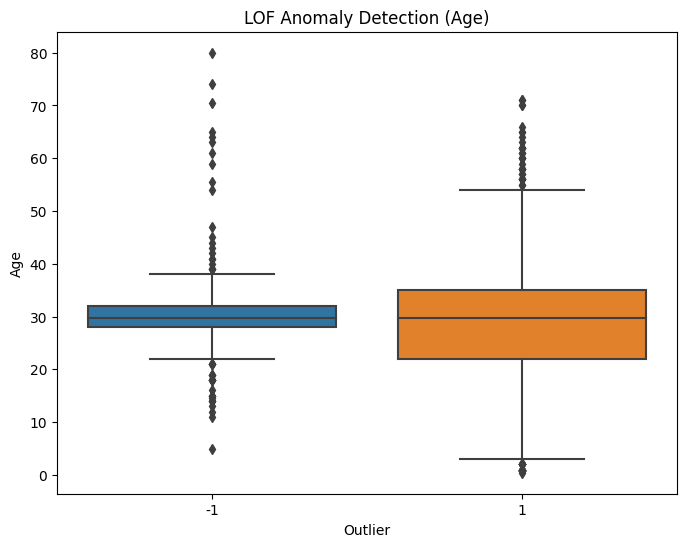

In [16]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF to identify anomalies
lof = LocalOutlierFactor(n_neighbors=20)
outlier_scores = lof.fit_predict(titanic_df_scaled)
titanic_df['Outlier'] = outlier_scores

# Visualize anomalies using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlier', y='Age', data=titanic_df)  # Example using Age feature
plt.title('LOF Anomaly Detection (Age)')
plt.show()


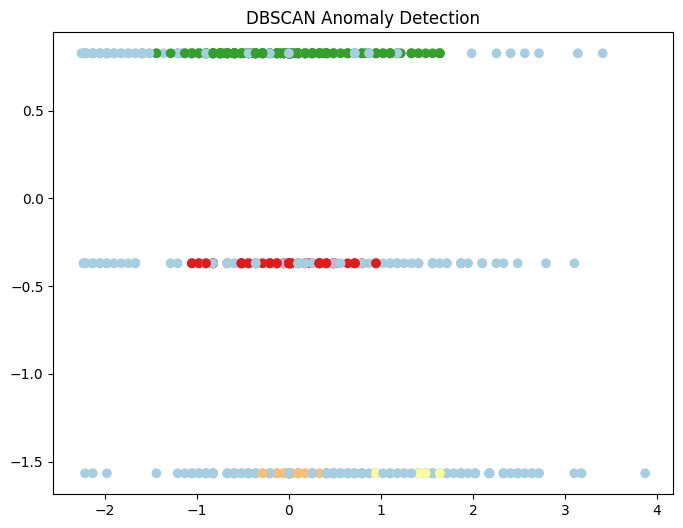

In [17]:
#DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN to identify anomalies
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust parameters as needed
outlier_labels = dbscan.fit_predict(titanic_df_scaled)
titanic_df['Outlier'] = outlier_labels

# Visualize cluster and outlier assignments
plt.figure(figsize=(8, 6))
plt.scatter(titanic_df_scaled[:, 0], titanic_df_scaled[:, 1], c=outlier_labels, cmap='Paired')
plt.title('DBSCAN Anomaly Detection')
plt.show()
